In [1]:
!rm -rf * .* 2>/dev/null
!rm -rf ~/.kaggle && mkdir ~/.kaggle
!echo eyJ1c2VybmFtZSI6InB2dHNlYzB4MSIsImtleSI6IjZlOTYxZmMxYjdhYzU2OTlmNzcwYmFjMjI1NTk4MWIwIn0= | base64 -d > ~/.kaggle/kaggle.json
!git clone https://github.com/Reshmavineesh/SunLit-Segmentation .
!git checkout dev
!./download_dataset.sh
from IPython.display import clear_output
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'; clear_output()
print("Dataset ready")

Dataset ready


In [2]:
import utils
import tensorflow as tf

image_path = 'dataset/dataset_tomato_128/color_images/'
mask_path = 'dataset/dataset_tomato_128/masks/'
n_val = 100

train_images, train_masks, test_images, test_masks = utils.load_dataset(image_path, mask_path, n_val)
print(f"Train Images:\t{train_images.shape}")
print(f"Train Masks:\t{train_masks.shape}")
print(f"Test Images:\t{test_images.shape}")
print(f"Test Masks:\t{test_masks.shape}")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Train Images:	(4748, 128, 128, 3)
Train Masks:	(4748, 128, 128)
Test Images:	(100, 128, 128, 3)
Test Masks:	(100, 128, 128)


In [3]:
from keras_models.models import FRRNA
from tensorflow.keras.callbacks import EarlyStopping


EPOCHS = 200
LEARNING_RATE = 0.001
BATCH_SIZE = 16
early_stopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)
loss=utils.dice_loss
metrics = ['accuracy']
input_shape = train_images.shape[1:]

train_attr = {
    "lr": LEARNING_RATE,
    "batch_size": BATCH_SIZE,
    "optimizer": optimizer.get_config()['name'],
    "loss_fn": loss.get_config()['name']
}

model = FRRNA(input_shape)
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

history = model.fit(train_images,
                    train_masks,
                    validation_split = 0.25,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    callbacks=[early_stopper])

Epoch 1/200
223/223 [==============================] - 88s 227ms/step - loss: 0.4183 - accuracy: 0.7952 - val_loss: 0.3924 - val_accuracy: 0.7224
Epoch 2/200
223/223 [==============================] - 47s 211ms/step - loss: 0.3907 - accuracy: 0.8175 - val_loss: 0.3776 - val_accuracy: 0.8027
Epoch 3/200
223/223 [==============================] - 47s 211ms/step - loss: 0.3831 - accuracy: 0.8208 - val_loss: 0.3937 - val_accuracy: 0.7119
Epoch 4/200
223/223 [==============================] - 47s 211ms/step - loss: 0.3798 - accuracy: 0.8224 - val_loss: 0.3509 - val_accuracy: 0.8055
Epoch 5/200
223/223 [==============================] - 47s 211ms/step - loss: 0.3763 - accuracy: 0.8261 - val_loss: 0.3640 - val_accuracy: 0.7661
Epoch 6/200
223/223 [==============================] - 47s 211ms/step - loss: 0.3715 - accuracy: 0.8285 - val_loss: 0.3520 - val_accuracy: 0.8046
Epoch 7/200
223/223 [==============================] - 47s 211ms/step - loss: 0.3695 - accuracy: 0.8300 - val_loss: 0.3678 -

1/1 [==============================] - 0s 22ms/step


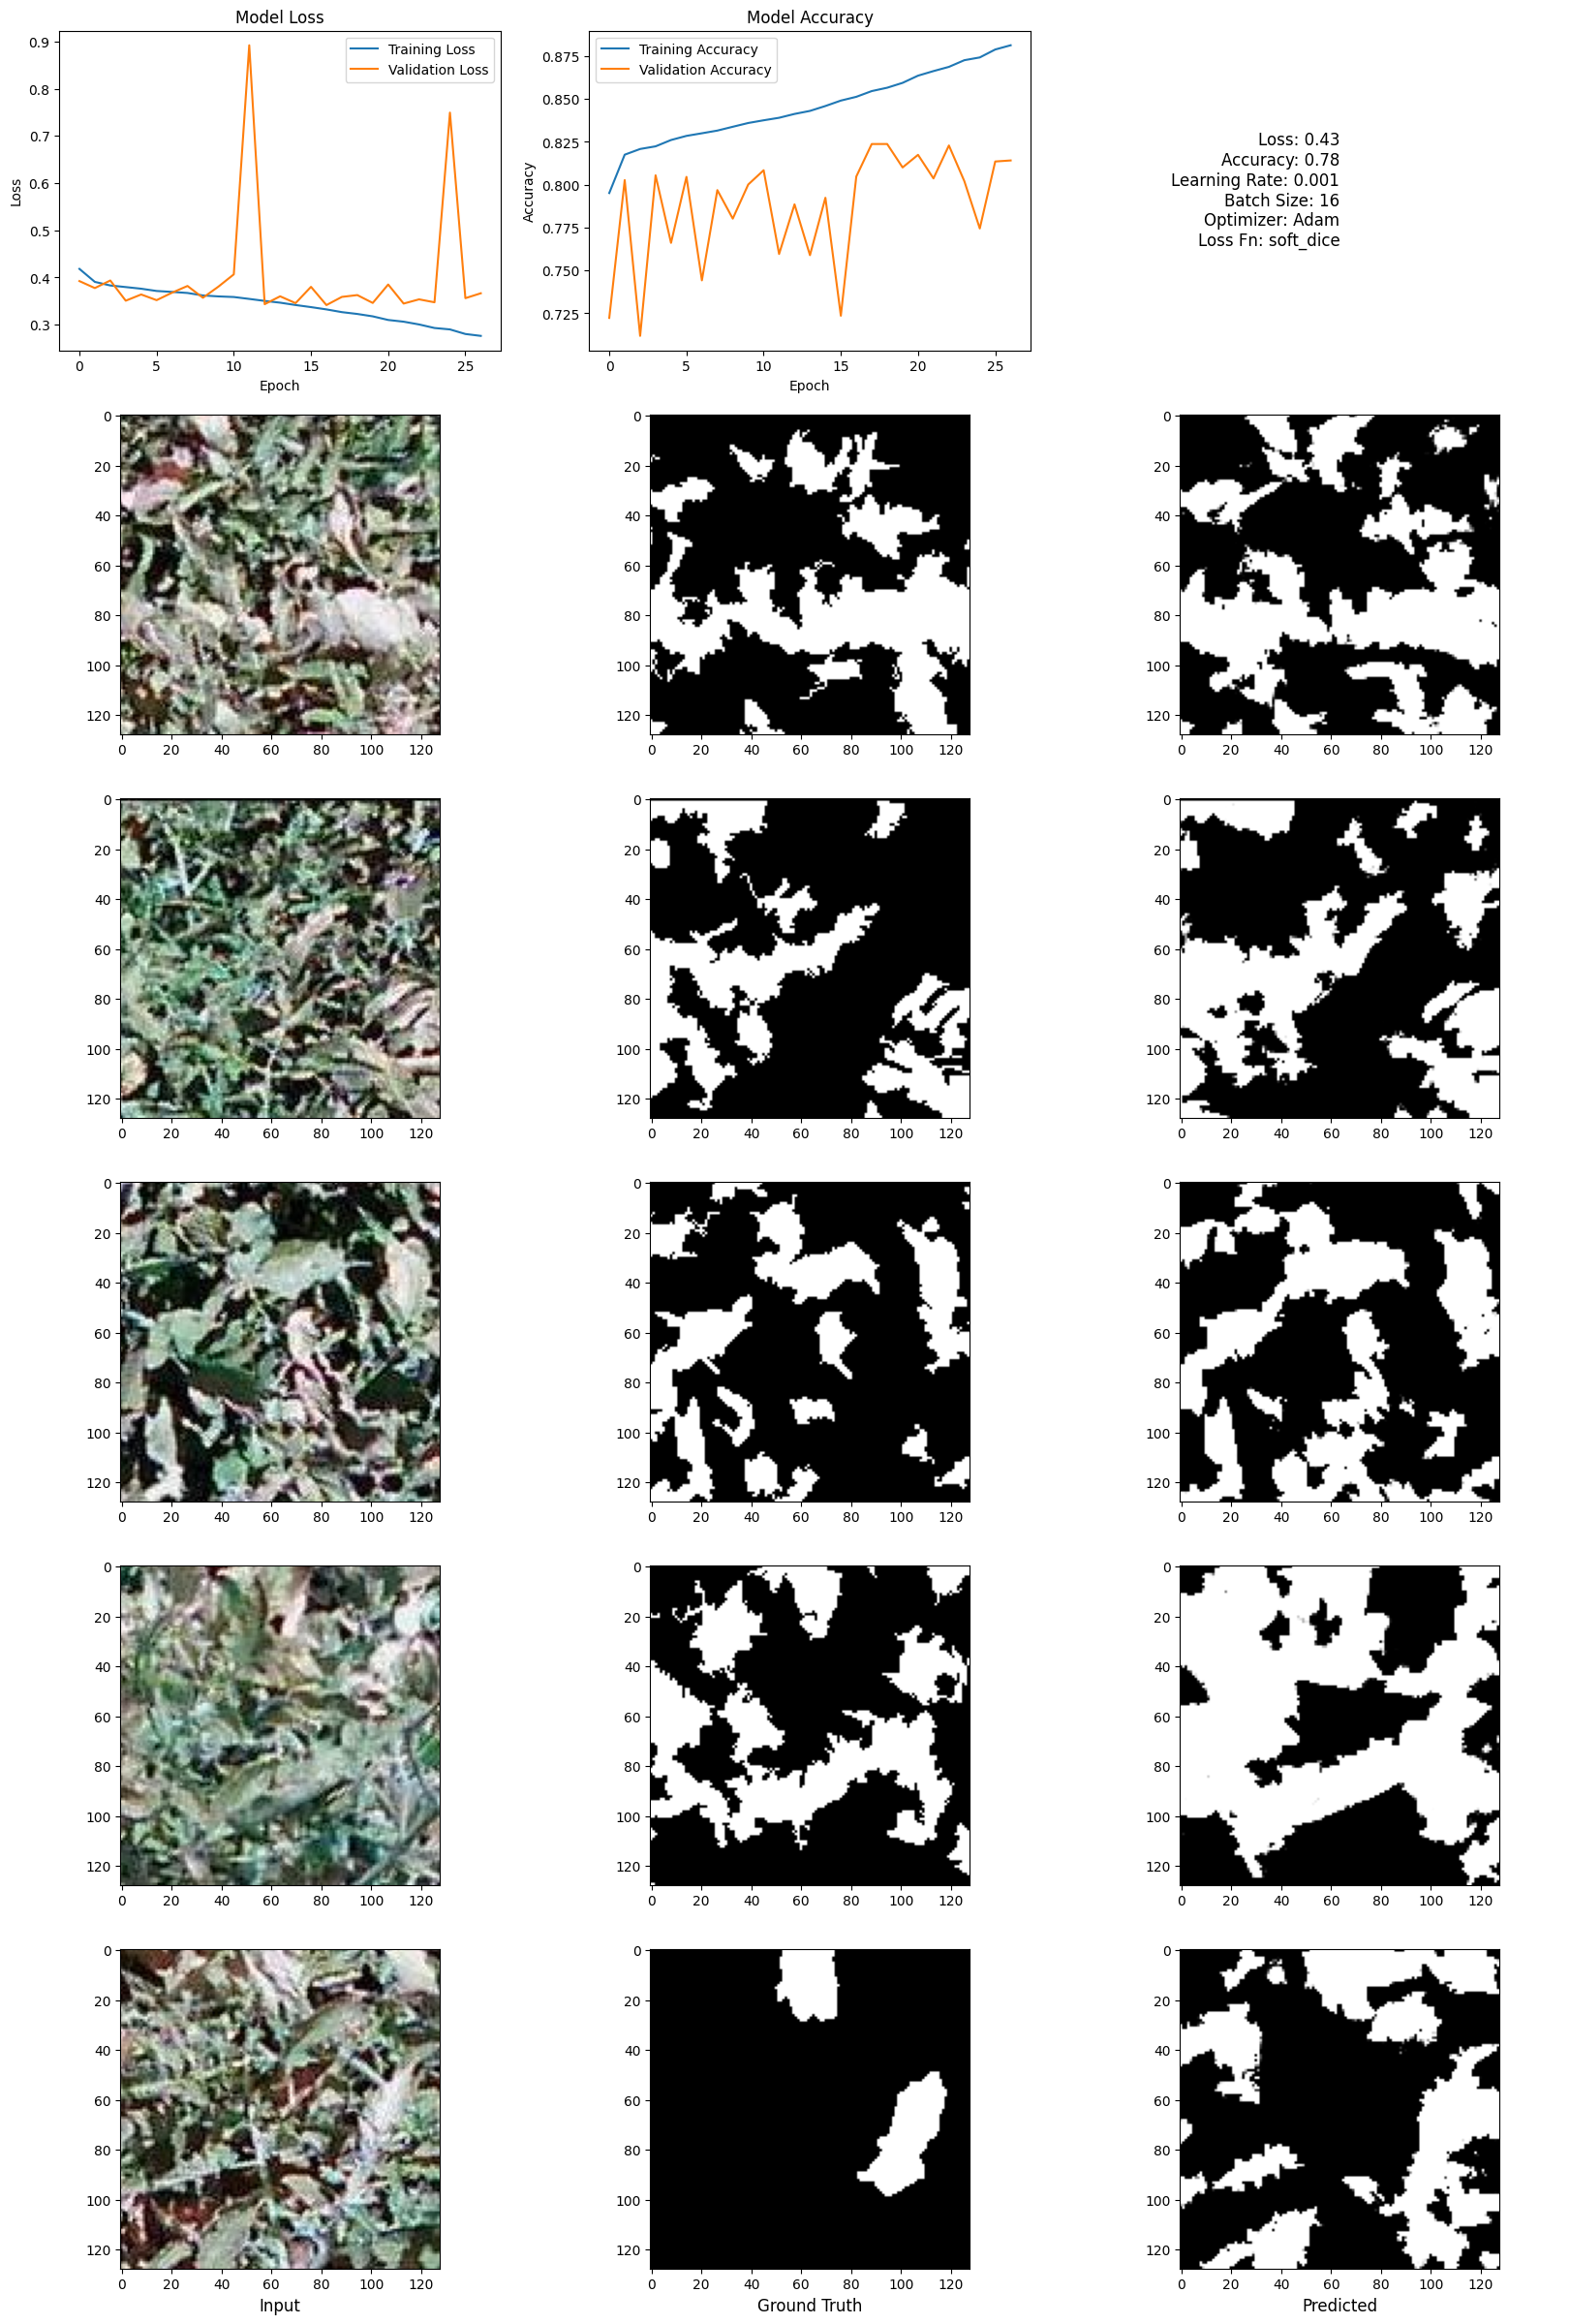

In [4]:
utils.analyzer(history, model, image_path, mask_path, test_images, test_masks, train_attr)